# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

In [ ]:
df=pd.read_csv('/content/Traffic Data.csv')

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
df.head(20)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
5,4257.0,293.66,0.0,0.0,75,Rain,moderate rain,2018-06-09 12:00:00
6,3707.0,292.75,0.0,0.0,40,Rain,proximity shower rain,2018-07-26 19:00:00
7,5646.0,299.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,2018-08-03 15:00:00
8,2642.0,275.29,0.0,0.0,90,Fog,fog,2018-01-10 20:00:00
9,801.0,296.43,0.0,0.0,1,Clear,sky is clear,2018-08-09 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [ ]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,Month
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2016,11
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,2016,11
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,2016,11
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2016,11
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,2016,11
...,...,...,...,...,...,...,...,...,...,...
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,2018,9
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2018,9
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2018,9
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,2018,9


In [ ]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,Month
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2016,11
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,2016,11
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,2016,11
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2016,11
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,2016,11
...,...,...,...,...,...,...,...,...,...,...
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,2018,9
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2018,9
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2018,9
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,2018,9


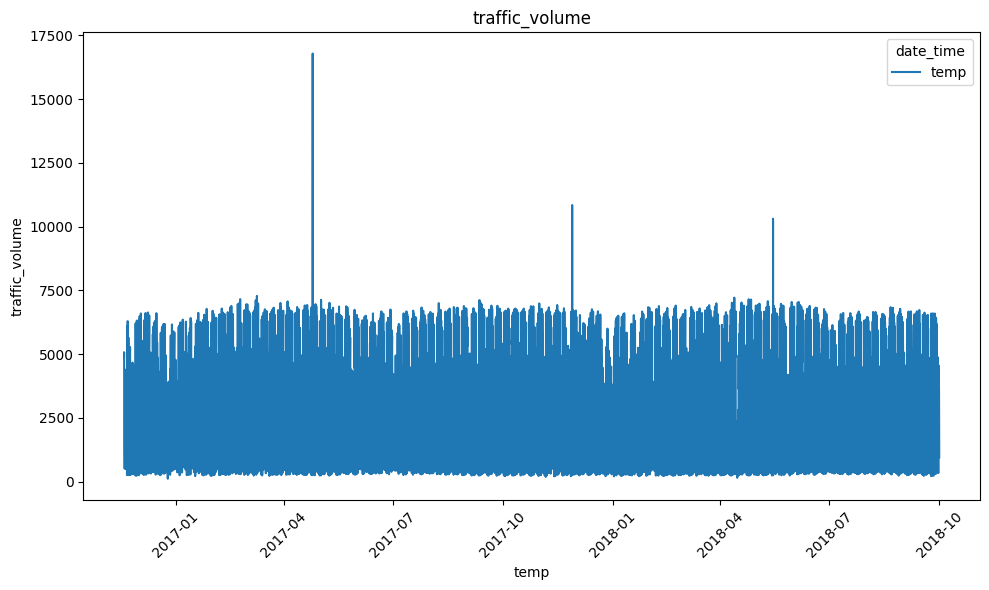

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['date_time'], df['traffic_volume'], label='temp')
plt.title('traffic_volume')
plt.xlabel('temp')
plt.ylabel('traffic_volume')
plt.legend(title='date_time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
fig = px.box(df, y="traffic_volume")
fig.show()

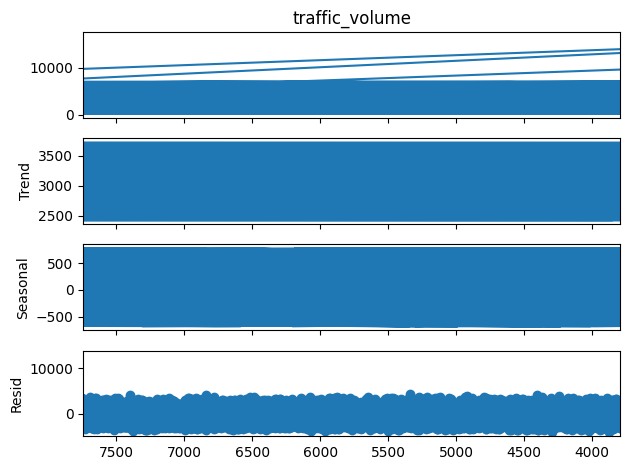

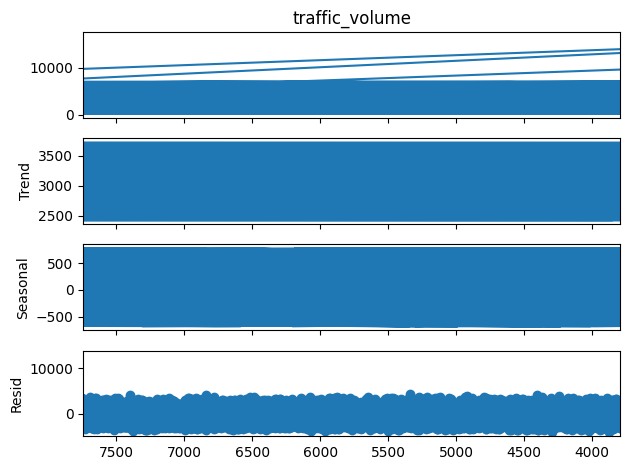

In [ ]:
result = seasonal_decompose(df['traffic_volume'],
                            model ='additive',
                            period=365)

result.plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
Year,0
Month,0


In [ ]:
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

In [ ]:
df.sort_values(by='date_time', inplace=True)

df.head(30)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,Month
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2016,11
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,2016,11
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,2016,11
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2016,11
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,2016,11
18985,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,2016-11-18 16:00:00,2016,11
14066,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,2016-11-18 17:00:00,2016,11
6235,4328.0,273.62,0.0,0.0,90,Mist,mist,2016-11-18 17:00:00,2016,11
8329,4328.0,273.62,0.0,0.0,90,Fog,fog,2016-11-18 17:00:00,2016,11
7976,3486.0,273.59,0.0,0.0,90,Mist,mist,2016-11-18 18:00:00,2016,11


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
new_df = df[['date_time', 'traffic_volume']]
new_df.set_index('date_time', inplace=True)

new_df['traffic_volume'] = new_df['traffic_volume'].shift(1)
new_df.reset_index(inplace=True)

new_df = new_df.drop(new_df.index[0])
new_df.head()

<ipython-input-56-82445fd21812>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_time,traffic_volume
1,2016-11-18 15:00:00,4872.0
2,2016-11-18 15:00:00,4872.0
3,2016-11-18 16:00:00,4872.0
4,2016-11-18 16:00:00,5074.0
5,2016-11-18 16:00:00,5074.0


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month

In [ ]:
df.head(20)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,Month
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2016,11
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,2016,11
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,2016,11
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2016,11
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,2016,11
18985,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,2016-11-18 16:00:00,2016,11
14066,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,2016-11-18 17:00:00,2016,11
6235,4328.0,273.62,0.0,0.0,90,Mist,mist,2016-11-18 17:00:00,2016,11
8329,4328.0,273.62,0.0,0.0,90,Fog,fog,2016-11-18 17:00:00,2016,11
7976,3486.0,273.59,0.0,0.0,90,Mist,mist,2016-11-18 18:00:00,2016,11


In [ ]:
df['date_time'].value_counts()

,count
date_time,
2017-04-15 07:00:00,5
2016-12-25 02:00:00,5
2018-09-20 18:00:00,5
2017-11-05 01:00:00,5
2018-04-13 21:00:00,5
...,...
2017-07-29 02:00:00,1
2017-07-29 03:00:00,1
2017-07-29 04:00:00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 7745 to 3795
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       20000 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
 8   Year                 20000 non-null  int32         
 9   Month                20000 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(2)
memory usage: 1.5+ MB


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
train_split = round(len(new_df) * 0.8)
train_data = new_df.iloc[:train_split]
test_data = new_df.iloc[train_split:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

train_data_scaled = scaler.fit_transform(train_data.iloc[:, 1].values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.iloc[:, 1].values.reshape(-1, 1))


train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=['traffic_volume_scaled'])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=['traffic_volume_scaled'])

In [ ]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)



In [ ]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Year,Month
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2016,11
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,2016,11
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,2016,11
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2016,11
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,2016,11
...,...,...,...,...,...,...,...,...,...,...
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,2018,9
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2018,9
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2018,9
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,2018,9


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
X_train, y_train = create_dataset(train_data_scaled, 30)
X_test, y_test = create_dataset(test_data_scaled, 30)

In [ ]:
print("Training set size:")
print(X_train.shape), print(y_train.shape)
print("Testing set size:")
print(X_test.shape), print(y_test.shape)

Training set size:
(15968, 30, 1)
(15968,)
Testing set size:
(3969, 30, 1)
(3969,)


(None, None)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
model_lstm = Sequential([
    LSTM(30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    LSTM(30, return_sequences=False),
    Dropout(0.2),

    Dense(1)
])



model_lstm.compile(optimizer='adam', loss='mean_absolute_error')
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,191 (43.71 KB)

 Trainable params: 11,191 (43.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history_2 = model_lstm.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 0.0885 - val_loss: 0.0432
Epoch 2/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0445 - val_loss: 0.0271
Epoch 3/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 0.0319 - val_loss: 0.0238
Epoch 4/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - loss: 0.0300 - val_loss: 0.0230
Epoch 5/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0284 - val_loss: 0.0234
Epoch 6/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0273 - val_loss: 0.0223
Epoch 7/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0276 - val_loss: 0.0223
Epoch 8/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0271 - val_loss: 0.0222
Epoch 9/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 0.0268 - val_loss: 0.0233
Epoch 10/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0264 - val_loss: 0.0215
Epoch 11/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0261 - val_loss: 0.0212
Epoch 12/80
499/499 ━━━━━━━━━━

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:

predicted_values_test = model_lstm.predict(X_test)


predicted_values_test_reshaped = np.hstack((predicted_values_test, np.zeros((predicted_values_test.shape[0], 1))))
predicted_values_test_rescaled =scaler.inverse_transform(predicted_values_test_reshaped)
predicted_values_test_rescaled = predicted_values_test_rescaled[:, 0]

y_test_reshaped = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))))
testY_rescaled = scaler.inverse_transform(y_test_reshaped)
testY_rescaled = testY_rescaled[:, 0]




predicted_values_train = model_lstm.predict(X_train)


predicted_values_train_reshaped = np.hstack((predicted_values_train, np.zeros((predicted_values_train.shape[0], 1))))
predicted_values_train_rescaled = scaler.inverse_transform(predicted_values_train_reshaped)
predicted_values_train_rescaled = predicted_values_train_rescaled[:, 0]

y_train_reshaped = np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))))
trainY_rescaled = scaler.inverse_transform(y_train_reshaped)
trainY_rescaled = trainY_rescaled[:, 0]


print(f'Test MAE: {mean_absolute_error(testY_rescaled, predicted_values_test_rescaled)}')
print(f'Train MAE: {mean_absolute_error(trainY_rescaled, predicted_values_train_rescaled)}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
Test MAE: 282.894263516438
Train MAE: 288.87178602654166


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

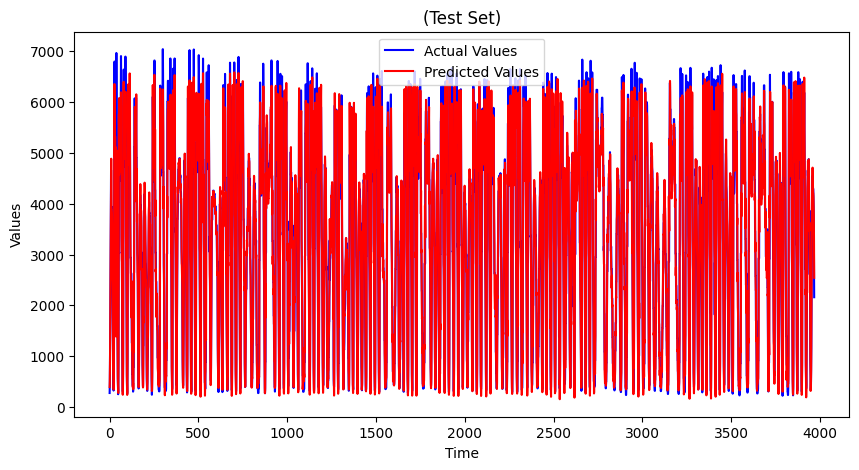

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(testY_rescaled, label='Actual Values', color='blue')
plt.plot(predicted_values_test_rescaled, label='Predicted Values', color='red')
plt.title('(Test Set)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

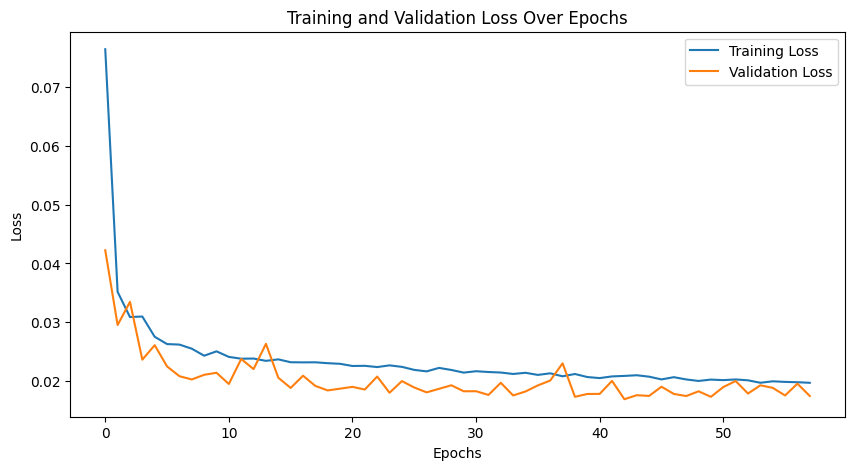

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
model_rnn = Sequential([
    SimpleRNN(30,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    SimpleRNN(30,return_sequences=True),
    Dropout(0.2),

    SimpleRNN(30),
    Dense(1)
])

model_rnn.compile(optimizer='adam',loss='mean_absolute_error')

model_rnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 30)              │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 30, 30)              │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,651 (18.17 KB)

 Trainable params: 4,651 (18.17 KB)

 Non-trainable params: 0 (0.00 B)

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights_rnn.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history = model_rnn.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 0.1254 - val_loss: 0.0422
Epoch 2/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0372 - val_loss: 0.0295
Epoch 3/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0315 - val_loss: 0.0335
Epoch 4/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0344 - val_loss: 0.0236
Epoch 5/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0279 - val_loss: 0.0261
Epoch 6/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0266 - val_loss: 0.0225
Epoch 7/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0260 - val_loss: 0.0208
Epoch 8/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0262 - val_loss: 0.0203
Epoch 9/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 0.0245 - val_loss: 0.0211
Epoch 10/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0256 - val_loss: 0.0214
Epoch 11/80
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0240 - val_loss: 0.0195
Epoch 12/80
499/499 ━━━━━━━━━━

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:

predicted_values_test = model_rnn.predict(X_test)

predicted_values_test_reshaped = np.hstack((predicted_values_test, np.zeros((predicted_values_test.shape[0], 1))))
predicted_values_test_rescaled = scaler.inverse_transform(predicted_values_test_reshaped)
predicted_values_test_rescaled = predicted_values_test_rescaled[:, 0]

y_test_reshaped = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))))
testY_rescaled = scaler.inverse_transform(y_test_reshaped)
testY_rescaled = testY_rescaled[:, 0]




predicted_values_train = model_rnn.predict(X_train)

predicted_values_train_reshaped = np.hstack((predicted_values_train, np.zeros((predicted_values_train.shape[0], 1))))
predicted_values_train_rescaled = scaler.inverse_transform(predicted_values_train_reshaped)
predicted_values_train_rescaled = predicted_values_train_rescaled[:, 0]

y_train_reshaped = np.hstack((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))))
trainY_rescaled = scaler.inverse_transform(y_train_reshaped)
trainY_rescaled = trainY_rescaled[:, 0]



print(f'Test MAE: {mean_absolute_error(testY_rescaled, predicted_values_test_rescaled)}')
print(f'Train MAE: {mean_absolute_error(trainY_rescaled, predicted_values_train_rescaled)}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Test MAE: 281.74564799584783
Train MAE: 293.84291736171235


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


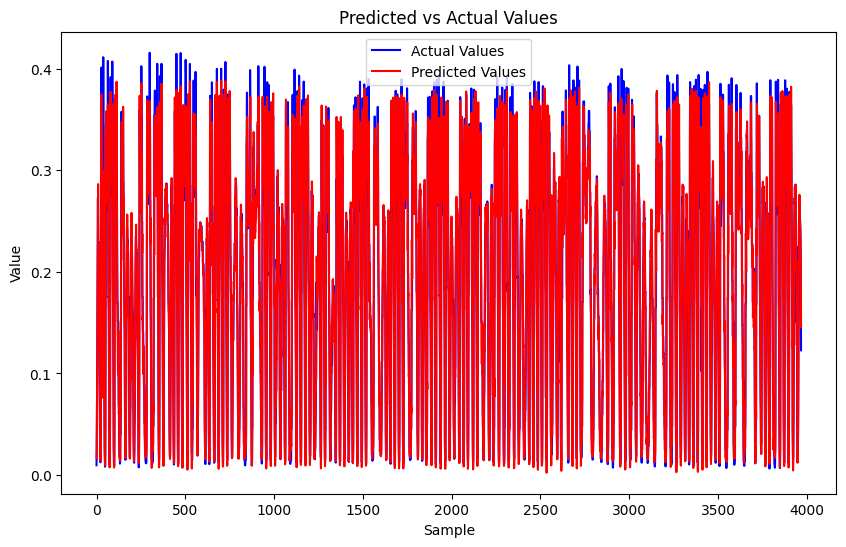

In [ ]:
y_pred = model_rnn.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

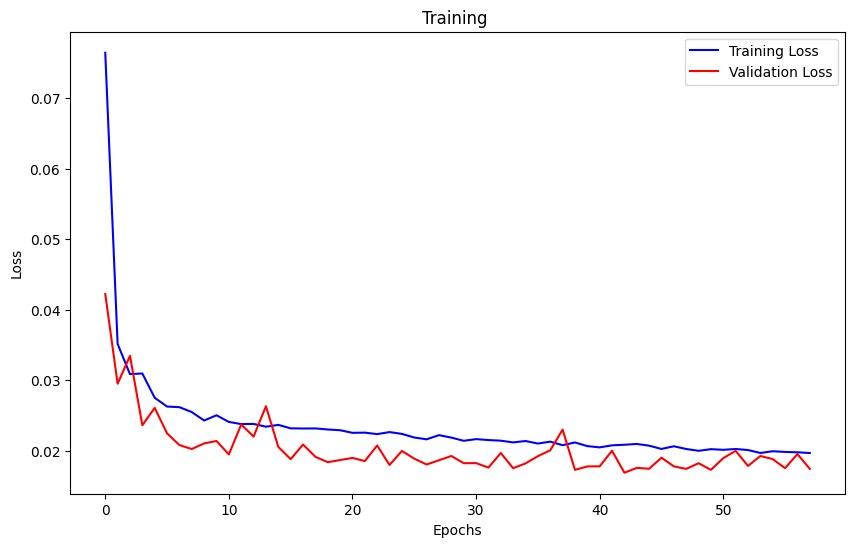

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training ')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

In [ ]:
#Data Preprocessing: شفت df.isna
#fillna وسويت له
#رتبت date_time كانت مو مرتبه

In [ ]:
#Feature Engineering shift(1):لفوق traffic_volum:حركت كل القيم في

In [ ]:
#Model Architecture:Model Architecture: نوع النموذج Rnn
# 3
#30

In [ ]:
#Training Process:batch_size=32
#راح يساعدني  في تحقيق توازن بين السرعة والدقة.


In [ ]:
#Loss Function and Metrics: اخترت MAE
#تقيس متوسط الفرق المطلق بين القيم المتوقعة والقيم الحقيقية

In [ ]:
#Model Tuning (If Done):

In [ ]:
#Overfitting and Underfitting:

In [ ]:
#Future Improvements:

### Answer Here: